## (nSN, zlim) metric

This metric is an estimate of the redshift limit z of a faint [(x1,color) = (-2.0,0.2)] supernovae and the number of medium supernovae ([(x1,color) = (0.0,0.0)]) with z<zlim
### Input parameters


## Imports

In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib notebook

## DB file choice

In [2]:
dbName = 'descddf_v1.4_10yrs'
dbFile = '/home/philippe/LSST/DB_Files/{}.db'.format(dbName)
#dbFile = dbName
opsimdb = db.OpsimDatabase(dbFile)
version = opsimdb.opsimVersion
#propinfo, proptags = opsimdb.fetchPropInfo()
#print('proptags and propinfo', proptags, propinfo)
runLength = opsimdb.fetchRunLength()

Cannot access Config table to retrieve runLength; using default 10 years


## Define slicer

In [3]:
slicer = slicers.HealpixSlicer(nside=64)


#ra = [20.]
#dec = [-50.]
#slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


## Metric instance

In [4]:
import healpy as hp
# metric instance
templateDir = 'reference_files_NSN_metric'
nside = 64
pixArea = hp.nside2pixarea(nside, degrees=True)
metric = SNNSNMetric(season=[-1], verbose=False, templateDir=templateDir,pixArea=pixArea)


### Make the bundle

In [5]:
bundleList = []

sql = ''
sql = '(note = "%s")' %('DD:COSMOS')
#sql += ' OR (note = "%s")' %('DD:ELAISS1')
#sql += ' OR (note = "%s")' %('DD:ECDFS')
#sql += ' OR (note = "%s")' %('DD:XMM-LSS')
#sql += ' OR (note = "%s")' %('DD:290')

print(sql)
bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=dbName))
print(len(bundleList))

(note = "DD:COSMOS")
1


In [6]:
outDir = '{}_NSN_zlim'.format(dbName)
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint (note = "DD:COSMOS") for columns ['fieldRA', 'observationStartMJD', 'fiveSigmaDepth', 'filter', 'observationId', 'numExposures', 'visitTime', 'visitExposureTime', 'night', 'fieldDec']
Found 27245 visits
Running:  ['descddf_v1_4_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL']
{'sid': 22762, 'ra': 2.6016314162540475, 'dec': 0.07298143613102792, 'nside': 64} <class 'dict'>
{'sid': 22763, 'ra': 2.6261751088602177, 'dec': 0.07298143613102792, 'nside': 64} <class 'dict'>
{'sid': 23017, 'ra': 2.5893595699509624, 'dec': 0.06254076179649126, 'nside': 64} <class 'dict'>
{'sid': 23018, 'ra': 2.6139032625571326, 'dec': 0.06254076179649126, 'nside': 64} <class 'dict'>
{'sid': 23019, 'ra': 2.6384469551633027, 'dec': 0.06254076179649126, 'nside': 64} <class 'dict'>
{'sid': 23274, 'ra': 2.6016314162540475, 'dec': 0.05210690963834175, 'nside': 64} <class 'dict'>
{'sid': 23275, 'ra': 2.6261751088602177, 'dec': 0.05210690963834175, 'nside': 64} <class 'dict'>
{'s

Plotting figures with "(note = "DD:COSMOS")" constraint now.


/home/philippe/LSST/nsn_zlim_maf/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


<IPython.core.display.Javascript object>


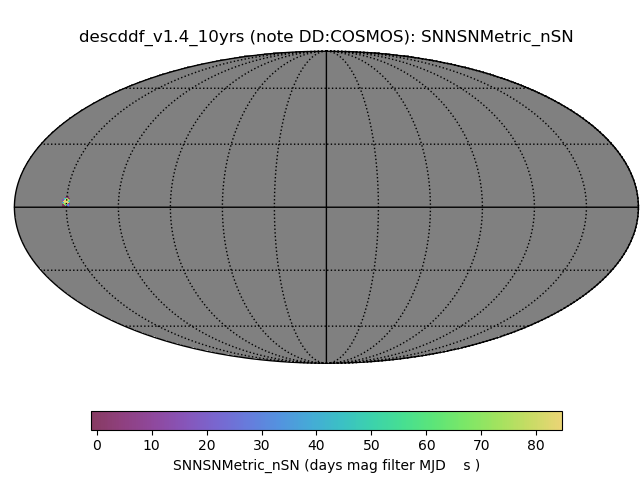

<IPython.core.display.Javascript object>


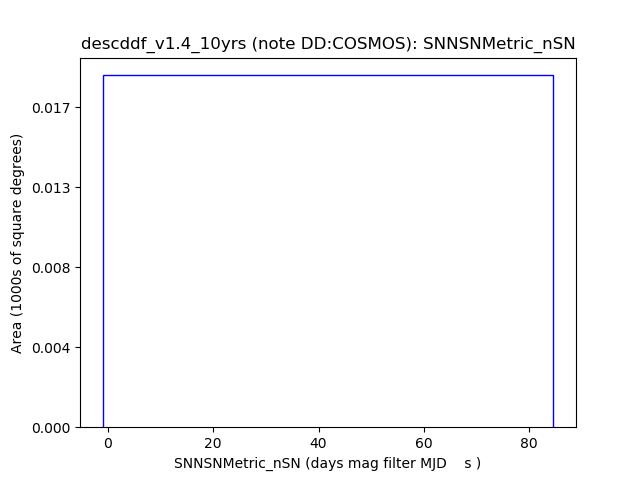

<IPython.core.display.Javascript object>


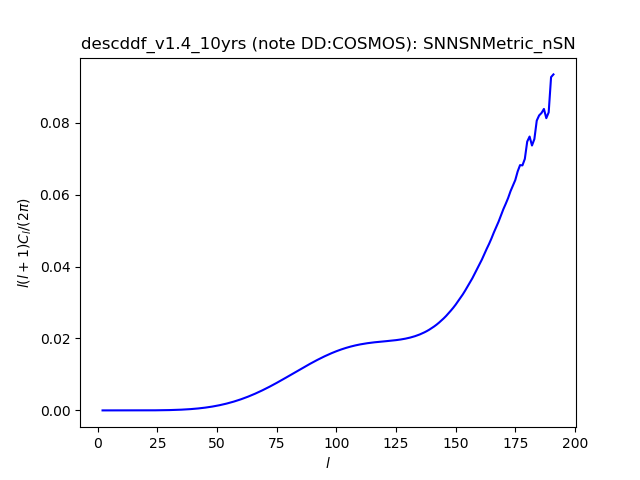

monopole: -130206  dipole: lon: 150.124, lat: 2.14252, amp: 130309


<IPython.core.display.Javascript object>


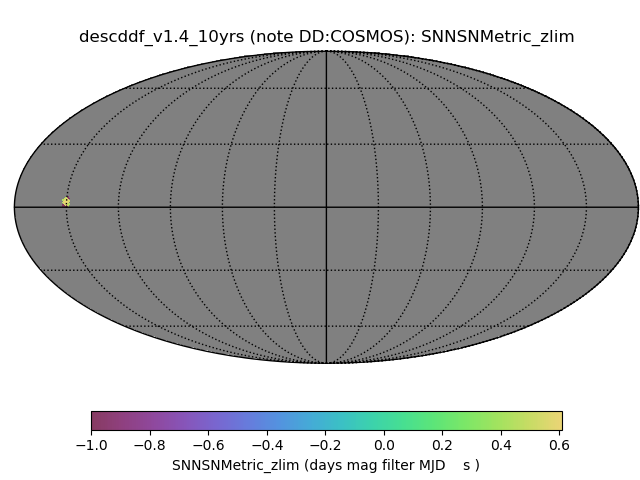

<IPython.core.display.Javascript object>


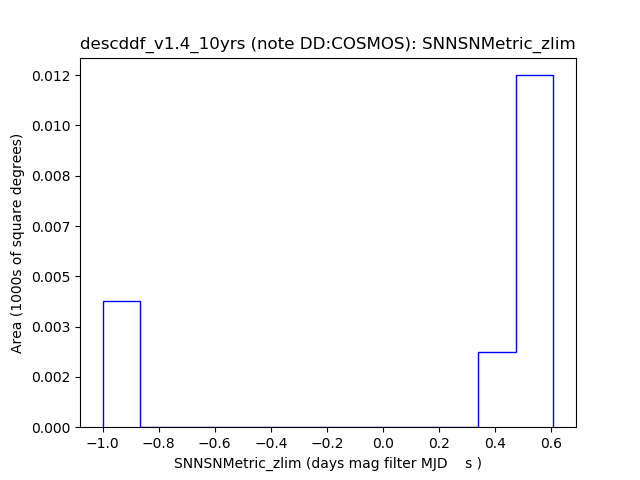

<IPython.core.display.Javascript object>


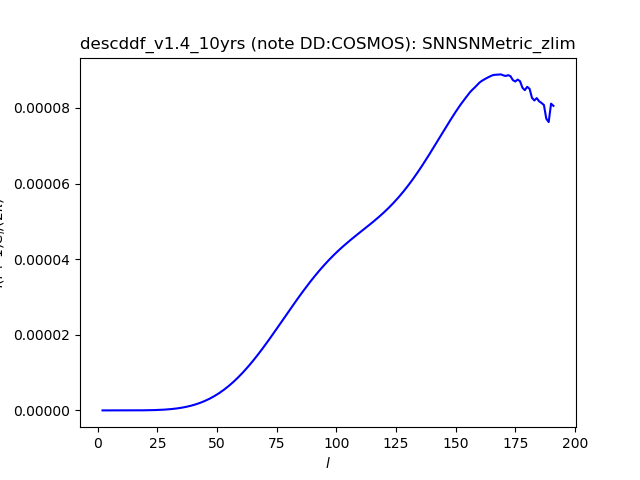

monopole: -1971.5  dipole: lon: 150.171, lat: 2.24171, amp: 1972.59
Plotting complete.


In [7]:
bgroup.plotAll(closefigs=False)
#import healpy as hp
#hp.mollview(bundleList[0].metricValues['nSN'])

In [8]:
bundleDict

{'descddf_v1_4_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fc3dc81b750>,
 'SNNSNMetric_nSN': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fc3dbc5b210>,
 'SNNSNMetric_zlim': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fc3dbc56f10>}

In [18]:
bundleDict['SNNSNMetric_nSN'].metricValues

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

<IPython.core.display.Javascript object>


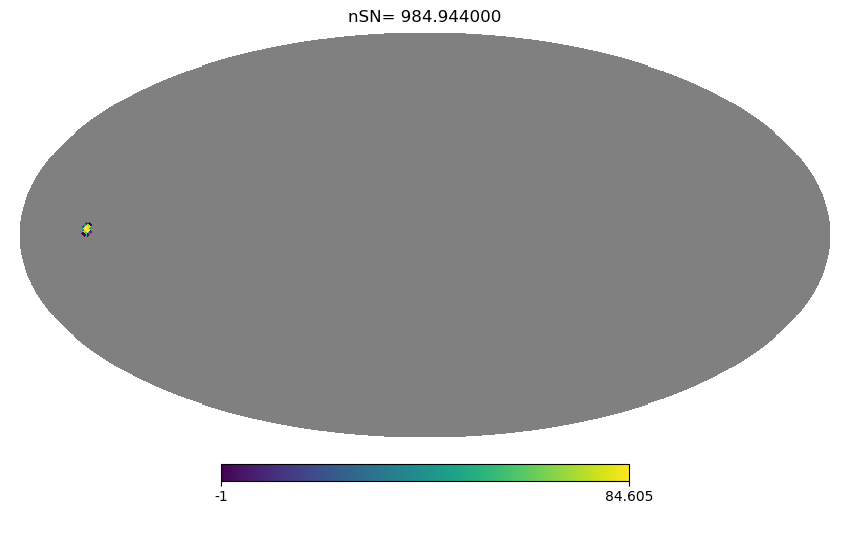

In [26]:
nSN = bundleDict['SNNSNMetric_nSN']
nSNValues = nSN.metricValues[~nSN.metricValues.mask]
nSNValues = nSNValues[nSNValues>-1]


hp.mollview(nSN.metricValues,title='nSN= %f' % np.sum(nSNValues))

<IPython.core.display.Javascript object>


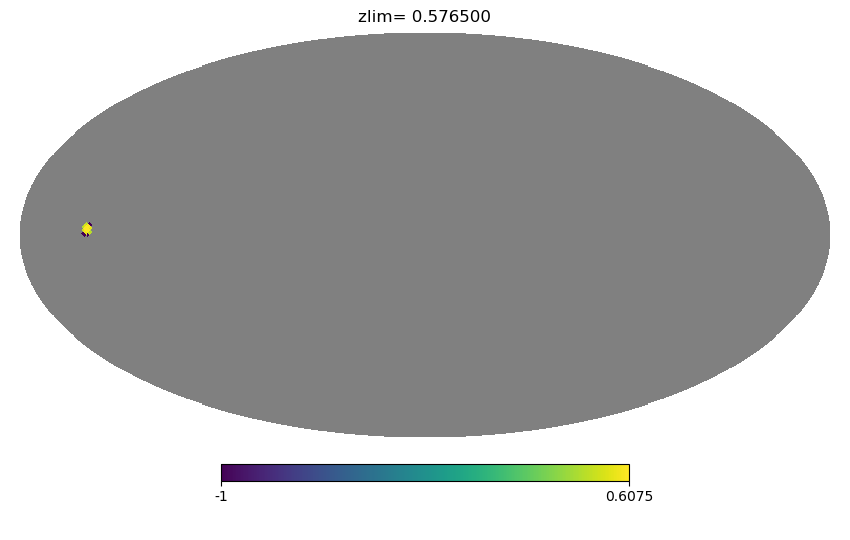

In [25]:
zlim = bundleDict['SNNSNMetric_zlim']
zlimValues = zlim.metricValues[~zlim.metricValues.mask]
zlimValues = zlimValues[zlimValues>-1]
hp.mollview(zlim.metricValues,title='zlim= %f' % np.median(zlimValues))

In [9]:
#bgroup.plotAll(closefigs=False)
#for vals in bundleList[0].metricValues:
#    print(vals)
restot = None
for val in bundleList:
    metValues = val.metricValues[~val.metricValues.mask]
    for vv in metValues:
        print(vv)
        if vv['nSN'] > 0.:
            if restot is None:
                restot = vv
            else:
                restot = np.concatenate((restot,vv))
                
#Now just make the plot manually
#print(restot.dtype)
#import healpy as hp
#hp.mollview(restot['nSN'],  title='sum= %f' % np.sum(restot['nSN']))

[(22762, 2.60163142, 0.07298144, 64, -1., -1.)]
[(22763, 2.62617511, 0.07298144, 64, 7.563, 0.444)]
[(23017, 2.58935957, 0.06254076, 64, -1., -1.)]
[(23018, 2.61390326, 0.06254076, 64, 73.354, 0.5765)]
[(23019, 2.63844696, 0.06254076, 64, 44.048, 0.525)]
[(23274, 2.60163142, 0.05210691, 64, 79.1, 0.5985)]
[(23275, 2.62617511, 0.05210691, 64, 84.605, 0.607)]
[(23276, 2.6507188, 0.05210691, 64, 15.378, 0.437)]
[(23529, 2.58935957, 0.04167873, 64, 49.576, 0.534)]
[(23275, 2.62617511, 0.05210691, 64, 84.605, 0.607)]
[(23531, 2.63844696, 0.04167873, 64, 84.163, 0.6075)]
[(23786, 2.60163142, 0.03125509, 64, 84.287, 0.607)]
[(23275, 2.62617511, 0.05210691, 64, 84.605, 0.607)]
[(23788, 2.6507188, 0.03125509, 64, 37.86, 0.497)]
[(24041, 2.58935957, 0.02083484, 64, 8.402, 0.427)]
[(23275, 2.62617511, 0.05210691, 64, 84.605, 0.607)]
[(24043, 2.63844696, 0.02083484, 64, 72.906, 0.58)]
[(24298, 2.60163142, 0.01041686, 64, 30.766, 0.486)]
[(24299, 2.62617511, 0.01041686, 64, 59.121, 0.555)]
[(24300,

In [10]:
print('nSn',np.sum(restot['nSN']),'zlim',np.median(restot['zlim']))

nSn 984.9440000000001 zlim 0.5765
